## Classification of handwritten digits from the Kaggle Digit Recognizer dataset.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam
import os

In [2]:
# Load the dataset
train = pd.read_csv('../data/Digit recognizer/train.csv')
test = pd.read_csv('../data/Digit recognizer/test.csv')

In [3]:
# Separate features and target
X = train.drop('label', axis=1)
y = train['label']


In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X: Contains the pixel values of the images after dropping the 'label' column from the training dataset.
y: Contains the labels corresponding to each image.

In [5]:
# Normalize the pixel values
X = X / 255.0
test = test / 255.0


Pixel values range from 0 to 255. By dividing by 255.0, we normalize the values to be between 0 and 1. This often helps improve the performance of machine learning models.

In [6]:
# Reshape the images to 28x28x1
X = X.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

Reshaping the data so that each image is 28x28 pixels with 1 channel (grayscale).

In [7]:
# One-hot encode the labels
y = to_categorical(y, num_classes=10)


Convert the labels to one-hot encoded format. For example, if a label is 3, it will be converted to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [8]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Split the data into training and validation sets with 20% of the data used for validation.

# Baseline Model (Logistic Regression)

In [9]:

# Flatten the images for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

Flatten the 28x28 images into a single vector of 784 features because logistic regression expects 1D input.

In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a logistic regression model with a maximum of 1000 iterations.
# Use y_train.argmax(axis=1) to convert one-hot encoded labels back to their original integer form.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_flat, y_train.argmax(axis=1))


LogisticRegression(max_iter=1000)

In [11]:
#Predict labels for the validation set.
# Print confusion matrix and classification report to evaluate the logistic regression model.

y_pred_lr = lr.predict(X_val_flat)
print(confusion_matrix(y_val.argmax(axis=1), y_pred_lr))
print(classification_report(y_val.argmax(axis=1), y_pred_lr))

[[787   0   1   1   3  12  10   1   1   0]
 [  0 890   4   0   1   3   1   3   6   1]
 [  4  15 757  11  12   7  11   9  20   0]
 [  1   3  28 818   0  38   2   9  24  14]
 [  3   2   5   1 780   2  10   5   5  26]
 [  6   4   8  24  10 618  17   2   9   4]
 [  8   1   7   0   4   8 751   2   4   0]
 [  0   1  11   6  14   5   1 823   5  27]
 [  3  11   6  28   7  26   6   3 740   5]
 [  5   4   5  12  16   7   0  28   8 753]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.91      0.87      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.93       893
           8       0.90      0.89      0.89       835
           9       0.91     

## SVM Model

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='auto')
svm.fit(X_train_flat, y_train.argmax(axis=1))


SVC(gamma='auto')

Initialize and train an SVM (Support Vector Machine) model using the RBF (Radial Basis Function) kernel.
The C parameter controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights.
gamma='auto' sets the gamma parameter to 1/n_features.

In [ ]:
y_pred_svm = svm.predict(X_val_flat)
print(confusion_matrix(y_val.argmax(axis=1), y_pred_svm))
print(classification_report(y_val.argmax(axis=1), y_pred_svm))


[[800   0   0   0   3   4   6   0   3   0]
 [  0 899   2   0   1   2   1   1   2   1]
 [  5   8 774   7  16   4  13   7  12   0]
 [  2   3  13 846   0  34   2  12  17   8]
 [  1   3   5   0 791   1   6   2   1  29]
 [  3   9   2  20   7 634  18   0   7   2]
 [  7   1   7   1   4   5 758   0   2   0]
 [  0   9  11   3  11   3   0 823   4  29]
 [  1  13   6  16   6  20   8   3 757   5]
 [  4   4   3  17  24   2   0  28   5 751]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       816
           1       0.95      0.99      0.97       909
           2       0.94      0.91      0.93       846
           3       0.93      0.90      0.92       937
           4       0.92      0.94      0.93       839
           5       0.89      0.90      0.90       702
           6       0.93      0.97      0.95       785
           7       0.94      0.92      0.93       893
           8       0.93      0.91      0.92       835
           9       0.91     

## Build and Train a CNN Model

In [18]:
num_classes = 10

In [19]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200)

# Evaluate the CNN model
y_pred_cnn = cnn.predict(X_val)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_val, axis=1)

print(confusion_matrix(y_true, y_pred_cnn_classes))
print(classification_report(y_true, y_pred_cnn_classes))

Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7966 - loss: 0.7536 - val_accuracy: 0.9676 - val_loss: 0.1120
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9715 - loss: 0.0935 - val_accuracy: 0.9756 - val_loss: 0.0778
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9812 - loss: 0.0593 - val_accuracy: 0.9767 - val_loss: 0.0751
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9807 - val_loss: 0.0619
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9871 - loss: 0.0406 - val_accuracy: 0.9858 - val_loss: 0.0426
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9854 - val_loss: 0.0502
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9915 - loss: 0.0241 - val_accuracy: 0.9858 - val_loss: 0.0449
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accu

# Save the CNN

In [15]:
# Save the digit classifier model to a specific path
cnn.save('../models/digit_classifier_cnn.h5')

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


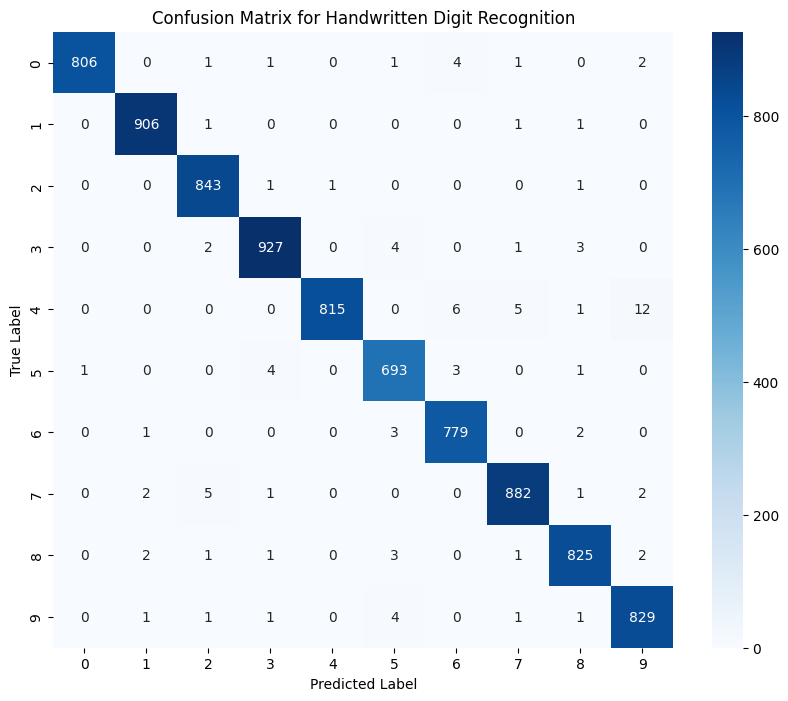

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the validation set
y_pred_cnn = cnn.predict(X_val)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_val, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_cnn_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Handwritten Digit Recognition')
plt.show()


Plotting learning curves

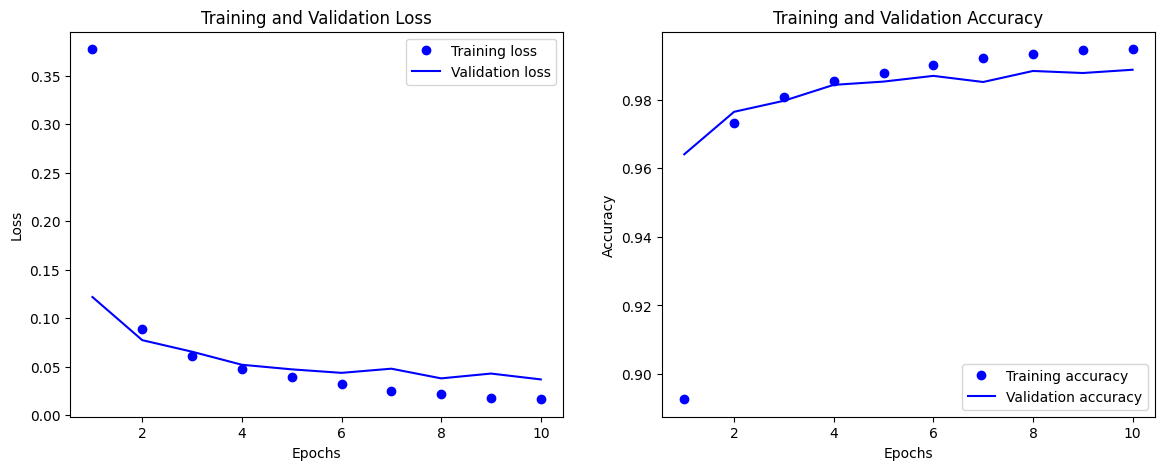

In [ ]:
# Retrieve the loss and accuracy for both training and validation sets
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

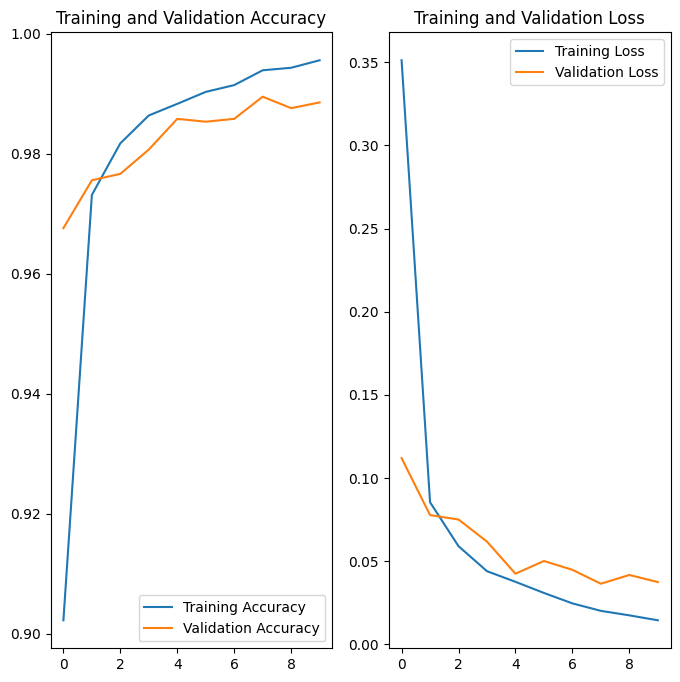

In [24]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Training Accuracy:  It appears to be increasing steadily over the epochs, which means the model’s performance on the training data is improving as it trains.
- Validation Accuracy:  It appears to be following a similar trend to the training accuracy, but with some fluctuations. This suggests that the model is generalizing well to unseen data.
- Training Loss:  It appears to be decreasing steadily over the epochs, which means the model is learning to minimize its loss function on the training data.
- Validation Loss: It appears to be following a similar trend to the training loss, but with some fluctuations. This suggests that the model is generalizing well to unseen data.

## Analysis between baseline model and CNN


- Model Complexity:

Linear Regression: This is a very simple model that assumes a linear relationship between the input features and the target variable. It generally performs well on simpler datasets where such a relationship exists but can struggle with more complex patterns.
CNN: Convolutional Neural Networks are much more complex and are specifically designed to handle image data. They can capture complex patterns, textures, and shapes in the images, which likely leads to the improved performance you're seeing.

- Data Suitability:

Linear Regression: While achieving a decent accuracy of 0.92, it suggests that the data has some linear characteristics that the linear regression model can exploit.
CNN: Achieving 0.99 accuracy suggests that the model is able to capture nearly all the relevant patterns in the data, making it highly suitable for this type of task (image classification).

- Accuracy Comparison:

The significant improvement from 0.92 to 0.99 demonstrates that CNNs are more effective for image classification tasks where complex and hierarchical features need to be extracted from the data.